# Call Center Report
### by Mercy Faith Nyambura Kariuki




### Introduction
This dataset contains call records from different call centers. Our purpose is to explore the effective of each dataset based on their response time, reason of calling and the average of a calls among other features that we'll explore.

> **<a href="https://data.world/markbradbourne/rwfd-real-world-fake-data/workspace/file?filename=Call+Center.csv">Dataset Link</a>**



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

%matplotlib inline
warnings.filterwarnings("ignore")

In [2]:
#let's upload the dataset and view the table
calls=pd.read_csv('C:/Users/kariu/OneDrive/Desktop/Data Science/Call Center Data/Call_Center.csv')
calls.head()

,id,customer_name,sentiment,csat_score,call_timestamp,reason,city,state,channel,response_time,call duration in minutes,call_center
0,DKK-57076809-w-055481-fU,Analise Gairdner,Neutral,7.0,10/29/2020,Billing Question,Detroit,Michigan,Call-Center,Within SLA,17,Los Angeles/CA
1,QGK-72219678-w-102139-KY,Crichton Kidsley,Very Positive,NaN,10/05/2020,Service Outage,Spartanburg,South Carolina,Chatbot,Within SLA,23,Baltimore/MD
2,GYJ-30025932-A-023015-LD,Averill Brundrett,Negative,NaN,10/04/2020,Billing Question,Gainesville,Florida,Call-Center,Above SLA,45,Los Angeles/CA
3,ZJI-96807559-i-620008-m7,Noreen Lafflina,Very Negative,1.0,10/17/2020,Billing Question,Portland,Oregon,Chatbot,Within SLA,12,Los Angeles/CA
4,DDU-69451719-O-176482-Fm,Toma Van der Beken,Very Positive,NaN,10/17/2020,Payments,Fort Wayne,Indiana,Call-Center,Within SLA,23,Los Angeles/CA


In [3]:
calls.dtypes

id                           object
customer_name                object
sentiment                    object
csat_score                  float64
call_timestamp               object
reason                       object
city                         object
state                        object
channel                      object
response_time                object
call duration in minutes      int64
call_center                  object
dtype: object

***The `call_timestamp` is of the wrong data format***

In [4]:
calls.isnull().sum()

id                              0
customer_name                   0
sentiment                       0
csat_score                  20670
call_timestamp                  0
reason                          0
city                            0
state                           0
channel                         0
response_time                   0
call duration in minutes        0
call_center                     0
dtype: int64

***`csat_score` has null values that conribute to 60% of the total scores. In this case, we'll fill the null values with the mean***

In [5]:
calls.csat_score.shape

(32941,)

In [6]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32941 entries, 0 to 32940
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        32941 non-null  object 
 1   customer_name             32941 non-null  object 
 2   sentiment                 32941 non-null  object 
 3   csat_score                12271 non-null  float64
 4   call_timestamp            32941 non-null  object 
 5   reason                    32941 non-null  object 
 6   city                      32941 non-null  object 
 7   state                     32941 non-null  object 
 8   channel                   32941 non-null  object 
 9   response_time             32941 non-null  object 
 10  call duration in minutes  32941 non-null  int64  
 11  call_center               32941 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 3.0+ MB


In [7]:
calls.describe()

,csat_score,call duration in minutes
count,12271.000000,32941.000000
mean,5.548448,25.021159
std,2.371059,11.816218
min,1.000000,5.000000
25%,4.000000,15.000000
50%,5.000000,25.000000
75%,7.000000,35.000000
max,10.000000,45.000000


In [8]:
calls.shape

(32941, 12)

In [9]:
calls.duplicated().sum()

0

In [10]:
calls.sentiment.unique()

array(['Neutral', 'Very Positive', 'Negative', 'Very Negative',
       'Positive'], dtype=object)

In [11]:
calls.reason.unique()

array(['Billing Question', 'Service Outage', 'Payments'], dtype=object)

In [12]:
calls.channel.unique()

array(['Call-Center', 'Chatbot', 'Email', 'Web'], dtype=object)

In [13]:
calls.call_center.unique()

array(['Los Angeles/CA', 'Baltimore/MD', 'Denver/CO', 'Chicago/IL'],
      dtype=object)

In [14]:
calls.response_time.unique()

array(['Within SLA', 'Above SLA', 'Below SLA'], dtype=object)

**Looks like our dataset is squeaky clean apart from the NaN values ofcourse**

### What is the structure of your dataset?

There are 32,941 diamonds in the dataset with 12 features (`id`, `customer_name`, `sentiment`, `csat_score`, `call_timestamp`, `reason`, `city`, `state`, `channel`, `repsonse_time`, `call duration in minutes`, `call_center`). Most variables are descriptive in nature, but the variables `csat_score`and `call duration in minutes` are numeric variables with the following variations:

sentiment: Neutral, Positive, Very Positive, Negative, Very Negative <br>
reason:  Billing Question, Service Outage, Payments <br>
channel: Call-Center, Chatbot, Email, Web <br>
call center: Los Angeles/CA, Baltimore/MD, Denver/CO, Chicago/IL
response time: Within SLA, Below SLA, Above SLA

### What is/are the main feature(s) of interest in your dataset?

I'm most interested in figuring out which call centers received most calls, the prevailing call reason and centers that responded to calls as per the service level agreement (SLA)

> ***A service-level agreement (SLA) defines the level of service expected by a customer from a supplier, laying out the metrics by which that service is measured, and the remedies or penalties, if any, should the agreed-on service levels not be achieved.***





# Data Wrangling

> - Drop `customer_name`. We don't need customer names to conduct the call center analysis
> - Convert `call_timestamp` datatype to date
> - `csat_score` has 20,670 null values which constitutes to 62% of the score. Conver NaN to mean of csat_score

> - Create a copy of the dataset

In [15]:
calls_clean=calls.copy()

**Define:** Drop `customer_name`, `id`. We don't need a customer's name or the ID to perform our analysis

**Code**

In [16]:
calls_clean.columns

Index(['id', 'customer_name', 'sentiment', 'csat_score', 'call_timestamp',
       'reason', 'city', 'state', 'channel', 'response_time',
       'call duration in minutes', 'call_center'],
      dtype='object')

In [17]:
calls_clean=calls_clean.drop('customer_name', axis=1)

In [18]:
calls_clean=calls_clean.drop('id', axis=1)

**Test**

In [19]:
calls_clean.columns

Index(['sentiment', 'csat_score', 'call_timestamp', 'reason', 'city', 'state',
       'channel', 'response_time', 'call duration in minutes', 'call_center'],
      dtype='object')

**Define:** Convert `call_timestamp` to date

**Code**

In [20]:
calls_clean['call_timestamp'] = pd.to_datetime(calls_clean['call_timestamp'])

In [21]:
calls_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32941 entries, 0 to 32940
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   sentiment                 32941 non-null  object        
 1   csat_score                12271 non-null  float64       
 2   call_timestamp            32941 non-null  datetime64[ns]
 3   reason                    32941 non-null  object        
 4   city                      32941 non-null  object        
 5   state                     32941 non-null  object        
 6   channel                   32941 non-null  object        
 7   response_time             32941 non-null  object        
 8   call duration in minutes  32941 non-null  int64         
 9   call_center               32941 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(7)
memory usage: 2.5+ MB


**Define:** `csat_score` has 20,670 null values which constitutes to 62% of the score. Convert the null values to mean of csat_score

In [22]:
calls_clean.csat_score.unique()

array([ 7., nan,  1.,  5.,  8.,  4.,  2.,  6.,  9.,  3., 10.])

**Code**

In [23]:
mean=calls_clean['csat_score'].mean()
calls_clean['csat_score']=calls_clean['csat_score'].fillna(mean)

**Test**

In [24]:
calls_clean.isnull().sum()

sentiment                   0
csat_score                  0
call_timestamp              0
reason                      0
city                        0
state                       0
channel                     0
response_time               0
call duration in minutes    0
call_center                 0
dtype: int64

# Part I

## Univariate Exploration

## Data Exploration


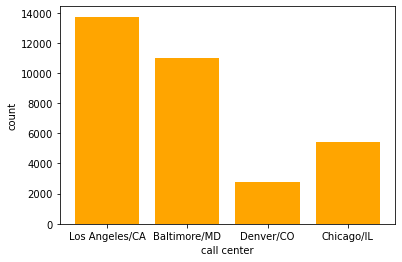

In [25]:
# Return the Series having unique values
x = calls_clean['call_center'].unique()

# Return the Series having frequency count of each unique value
y = calls_clean['call_center'].value_counts(sort=False)

plt.bar(x, y, color='orange')

# Labeling the axes
plt.xlabel('call center')
plt.ylabel('count')
plt.show()

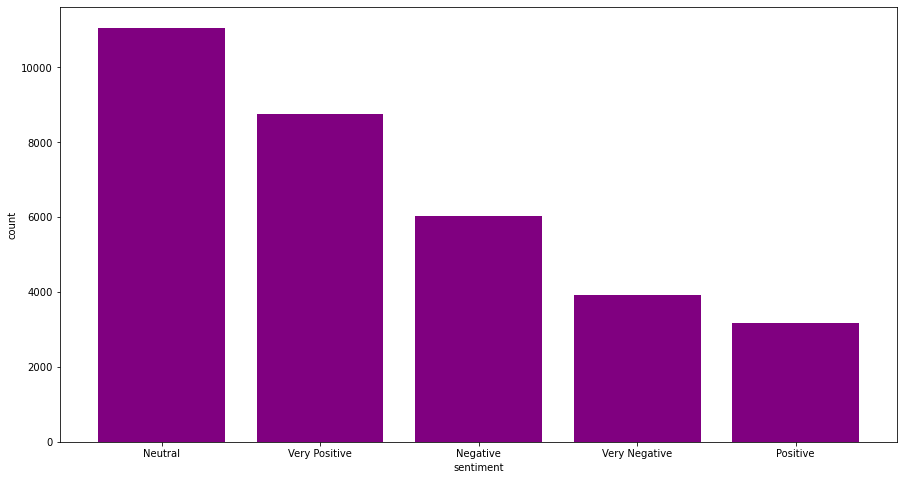

In [26]:
# Return the Series having unique values
x = calls_clean['sentiment'].unique()

# Return the Series having frequency count of each unique value
y = calls_clean['sentiment'].value_counts(sort=True)

plt.figure(figsize=[15,8])
plt.bar(x, y, color='purple')

# Labeling the axes
plt.xlabel('sentiment')
plt.ylabel('count')
plt.show()

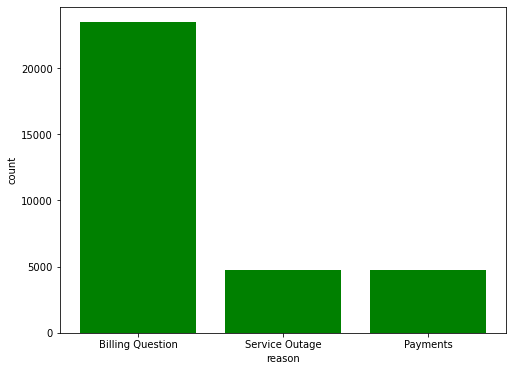

In [27]:
# Return the Series having unique values
x = calls_clean['reason'].unique()

# Return the Series having frequency count of each unique value
y = calls_clean['reason'].value_counts(sort=False)

plt.figure(figsize=[8,6])
plt.bar(x, y, color='green')

# Labeling the axes
plt.xlabel('reason')
plt.ylabel('count')
plt.show()

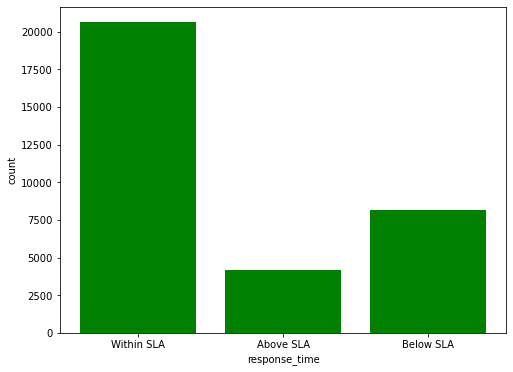

In [28]:
# Return the Series having unique values
x = calls_clean['response_time'].unique()

# Return the Series having frequency count of each unique value
y = calls_clean['response_time'].value_counts(sort=False)

plt.figure(figsize=[8,6])
plt.bar(x, y, color='green')

# Labeling the axes
plt.xlabel('response_time')
plt.ylabel('count')
plt.show()

# Part II

## 1. Which call center received the most calls?

In [29]:
calls_clean['call_center'].value_counts()

Los Angeles/CA    13734
Baltimore/MD      11012
Chicago/IL         5419
Denver/CO          2776
Name: call_center, dtype: int64

In [30]:
Los_Angeles_CA=13734/calls_clean['call_center'].value_counts().sum()*100
Baltimore_MD=11012/calls_clean['call_center'].value_counts().sum()*100
Chicago_IL=5419/calls_clean['call_center'].value_counts().sum()*100
Denver_CO=2776/calls_clean['call_center'].value_counts().sum()*100

print(f'Los Angeles/CA: ', Los_Angeles_CA)
print(f'Baltimore/MD: ', Baltimore_MD)
print(f'Chicago/IL: ', Chicago_IL)
print(f'Denver/CO: ', Denver_CO)

Los Angeles/CA:  41.69272335387511
Baltimore/MD:  33.42946480070429
Chicago/IL:  16.450623842627728
Denver/CO:  8.427188002792873


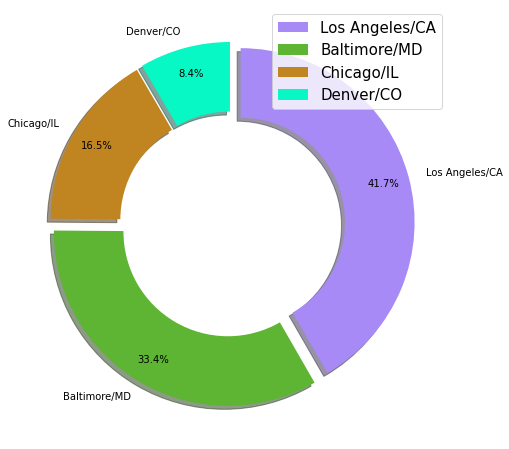

In [31]:
#a78af5, #8bfeae, #5eb433, #c08420 ,#c0b420, #f36007
colors = ['#a78af5', '#5eb433','#c08420', '#08f8c5', '#c0b420']
labels=['Los Angeles/CA', 'Baltimore/MD', 'Chicago/IL', 'Denver/CO']
sizes= [41.6, 33.4, 16.4, 8.4]
explode = (0.05, 0.05, 0.05, 0.05)
plt.figure(figsize=[8,8])
plt.pie(calls_clean['call_center'].value_counts(),
        labels=labels,
        autopct='%1.1f%%',
        startangle=90,
        counterclock=False,
        wedgeprops={'width':0.4},
        colors=colors, 
        shadow=True,
        pctdistance=0.85,
        explode=explode,);
plt.rcParams['font.size']=15
plt.legend()

## 2. Of the calls received, what's the highest sentiment?

In [32]:
calls_clean['sentiment'].value_counts()

Negative         11063
Neutral           8754
Very Negative     6026
Positive          3928
Very Positive     3170
Name: sentiment, dtype: int64

In [33]:
Negative=11063/calls_clean['sentiment'].value_counts().sum()*100
Very_Negative=8754/calls_clean['sentiment'].value_counts().sum()*100
Neutral=6026/calls_clean['sentiment'].value_counts().sum()*100
Positive=3928/calls_clean['sentiment'].value_counts().sum()*100
Very_Positive=3170/calls_clean['sentiment'].value_counts().sum()*100

print(f'Negative: ', Negative)
print(f'Very Negative: ', Very_Negative)
print(f'Neutral: ', Neutral)
print(f'Positive: ', Positive)
print(f'Very Positive: ', Very_Positive)

Negative:  33.58428705868067
Very Negative:  26.57478522206369
Neutral:  18.29331228560153
Positive:  11.924349594729971
Very Positive:  9.623265838924137


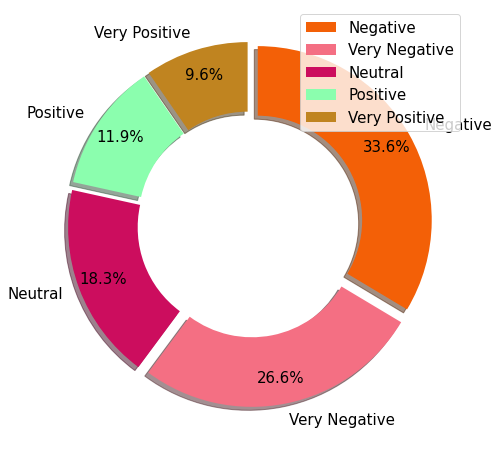

In [34]:
#93cde4, #f46f83, #cc0d5e, #a40dcc, #cc6d0d, #f68616
colors = ['#f36007', '#f46f83','#cc0d5e', '#8bfeae', '#c08420']
labels=['Negative', 'Very Negative', 'Neutral', 'Positive', 'Very Positive']
sizes= [33.5, 26.5, 18.2, 11.2, 9.6]
explode = (0.05, 0.05, 0.05, 0.05, 0.05)
plt.figure(figsize=[8,8])
plt.pie(calls_clean['sentiment'].value_counts(),
        labels=labels,
        autopct='%1.1f%%',
        startangle=90,
        counterclock=False,
        wedgeprops={'width':0.4},
        colors=colors, 
        shadow=True,
        pctdistance=0.85,
        explode=explode,);
plt.rcParams['font.size']=15
plt.legend()

## 3. What's the prevailing reason of the calls recieved? 

In [35]:
calls_clean['reason'].value_counts()

Billing Question    23462
Payments             4749
Service Outage       4730
Name: reason, dtype: int64

In [36]:
Billing_Question=23462/calls_clean['reason'].value_counts().sum()*100
Payments=4749/calls_clean['reason'].value_counts().sum()*100
Service_Outage=4730/calls_clean['reason'].value_counts().sum()*100

print(f'Billing Question: ', Billing_Question)
print(f'Payments: ', Payments)
print(f'Service Outage: ', Service_Outage)

Billing Question:  71.22431013023284
Payments:  14.416684375094865
Service Outage:  14.359005494672292


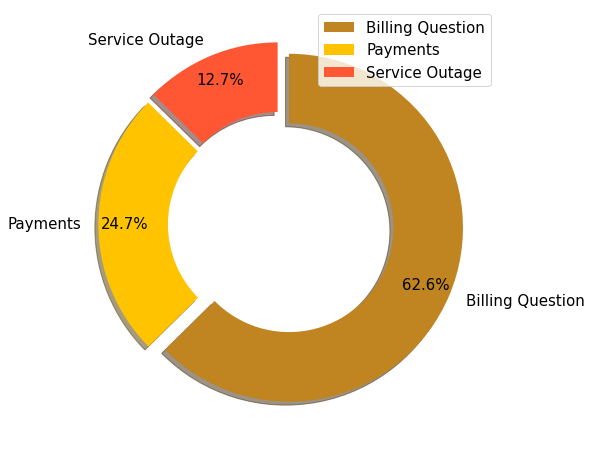

In [37]:
#DAF7A6, #FFC300, #FF5733, #C70039, #900C3F, #581845
colors = ['#c08420', '#FFC300','#FF5733']
labels=['Billing Question', 'Payments', 'Service Outage']
sizes= [71.2, 14.4, 14.3]
explode = (0.05, 0.05, 0.05)
plt.figure(figsize=[8,8])
plt.pie(calls_clean['response_time'].value_counts(),
        labels=labels,
        autopct='%1.1f%%',
        startangle=90,
        counterclock=False,
        wedgeprops={'width':0.4},
        colors=colors, 
        shadow=True,
        pctdistance=0.85,
        explode=explode,);
plt.rcParams['font.size']=15
plt.legend()

## 4. What's the number of calls that satisifed or didn't satisfy the Service Level Agreement?

In [38]:
calls_clean['response_time'].value_counts()

Within SLA    20625
Below SLA      8148
Above SLA      4168
Name: response_time, dtype: int64

In [39]:
Within_SLA=20625/calls_clean['response_time'].value_counts().sum()*100
Below_SLA=8148/calls_clean['response_time'].value_counts().sum()*100
Above_SLA=4168/calls_clean['response_time'].value_counts().sum()*100

print(f'Within SLA: ', Within_SLA)
print(f'Below SLA: ', Below_SLA)
print(f'Above SLA: ', Above_SLA)

Within SLA:  62.61194256397802
Below SLA:  24.735132509638444
Above SLA:  12.652924926383536


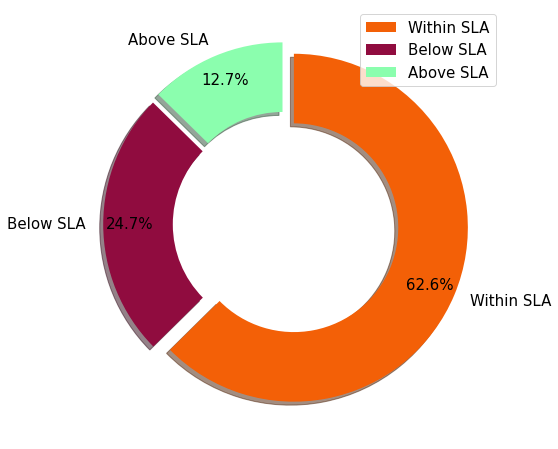

In [40]:
# Pie chart '#ff9999',#ff9999','#66b3ff','#99ff99'
colors = ['#f36007', '#900C3F','#8bfeae']
labels=['Within SLA', 'Below SLA', 'Above SLA']
sizes= [62.6, 24.7, 12.6]
explode = (0.05, 0.05, 0.05)
plt.figure(figsize=[8,8])
plt.pie(calls_clean['response_time'].value_counts(),
        labels=labels,
        autopct='%1.1f%%',
        startangle=90,
        counterclock=False,
        wedgeprops={'width':0.4},
        colors=colors, 
        shadow=True,
        pctdistance=0.85,
        explode=explode,);
plt.rcParams['font.size']=15
plt.legend()

## 5. Total Calls in Minutes

In [41]:
less_than_10=calls_clean['call duration in minutes'] < 10
less_than_10.value_counts()

False    28938
True      4003
Name: call duration in minutes, dtype: int64

In [42]:
less_than_20=calls_clean['call duration in minutes'] < 20 
less_than_20.value_counts()

False    20919
True     12022
Name: call duration in minutes, dtype: int64

In [43]:
less_than_30=calls_clean['call duration in minutes'] < 30
less_than_30.value_counts()

True     20072
False    12869
Name: call duration in minutes, dtype: int64

In [44]:
less_than_40=calls_clean['call duration in minutes'] < 40
less_than_40.value_counts()

True     28120
False     4821
Name: call duration in minutes, dtype: int64

In [45]:
greater_than_40=calls_clean['call duration in minutes'] >= 40
greater_than_40.value_counts()

False    28120
True      4821
Name: call duration in minutes, dtype: int64

In [46]:
less_than_ten=4003
ten_to_twenty=12022-4003
twenty_to_thirty=20072-12022
thirty_to_forty=28120-20072
greater_than_40=4821
print(f'Less than 10: ', less_than_ten)
print(f'10 t0 20: ', ten_to_twenty)
print(f'20 t0 30: ', twenty_to_thirty)
print(f'30 to 40: ', thirty_to_forty)
print(f'Greater than 40: ', greater_than_40)

Less than 10:  4003
10 t0 20:  8019
20 t0 30:  8050
30 to 40:  8048
Greater than 40:  4821


In [47]:
less_ten=less_than_ten/32941 * 100
ten_twenty=ten_to_twenty/32941 * 100
twenty_thirty=twenty_to_thirty/32941 * 100
thirty_forty=thirty_to_forty/32941 * 100
greater_forty=greater_than_40/32941 * 100
print(f'Less than 10: ', less_ten)
print(f'10 to 20: ', ten_twenty)
print(f'20 to 30: ', twenty_thirty)
print(f'30 to 40: ', thirty_forty)
print(f'Greater than 40: ', greater_forty)

Less than 10:  12.15202938587171
10 to 20:  24.34352326887465
20 to 30:  24.437630915879907
30 to 40:  24.431559454782796
Greater than 40:  14.635256974590934


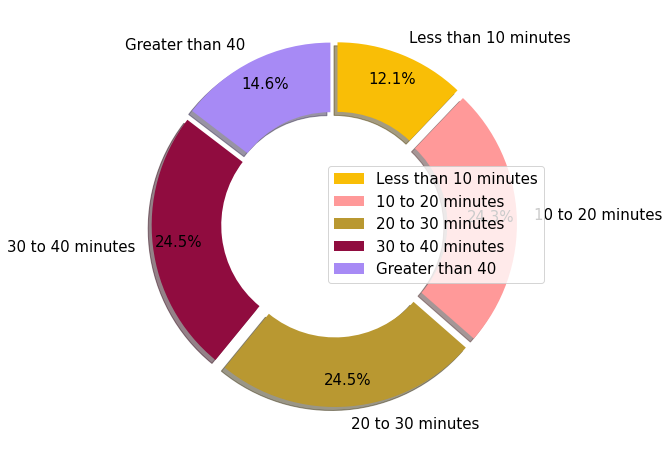

In [48]:
#f9be06, #9f7d12,#b99831, #f5db8a, #a78af5
colors = ['#f9be06', '#ff9999','#b99831', '#900C3F', '#a78af5']
labels=['Less than 10 minutes', '10 to 20 minutes', '20 to 30 minutes', '30 to 40 minutes', 'Greater than 40']
sizes= [12.1, 24.3, 24.437, 24.431, 14.6]
explode = (0.05, 0.05, 0.05, 0.05, 0.05)
plt.figure(figsize=[8,8])
plt.pie(sizes,
        labels=labels,
        autopct='%1.1f%%',
        startangle=90,
        counterclock=False,
        wedgeprops={'width':0.4},
        colors=colors, 
        shadow=True,
        pctdistance=0.85,
        explode=explode);
plt.rcParams['font.size']=15
plt.legend()

## 6. Prevailing Channel used to make calls


In [49]:
calls_clean.channel.unique()

array(['Call-Center', 'Chatbot', 'Email', 'Web'], dtype=object)

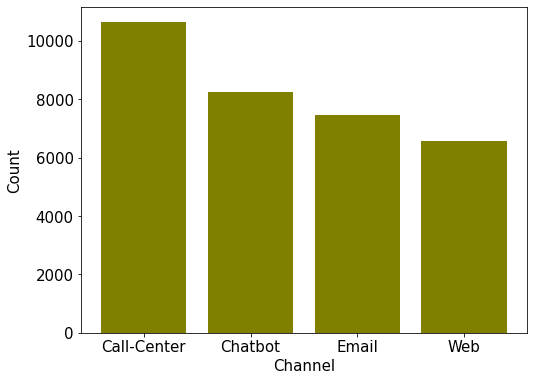

In [50]:
# Return the Series having unique values
x = calls_clean['channel'].unique()

# Return the Series having frequency count of each unique value
y = calls_clean['channel'].value_counts(sort=False)

plt.figure(figsize=[8,6])
plt.bar(x, y, color='olive')

# Labeling the axes
plt.xlabel('Channel')
plt.ylabel('Count')
plt.show()

In [51]:
calls.channel.value_counts()

Call-Center    10639
Chatbot         8256
Email           7470
Web             6576
Name: channel, dtype: int64

In [52]:
calls.channel.value_counts().sum()

32941

In [53]:
call_center=10639/calls.channel.value_counts().sum() * 100
chatbot=8256/calls.channel.value_counts().sum() * 100
email=7470/calls.channel.value_counts().sum() * 100
web=6576/calls.channel.value_counts().sum() * 100


print(f'Call Center: ', call_center)
print(f'Chatbot: ', chatbot)
print(f'Email: ', email)
print(f'Web: ', web)


Call Center:  32.29713730609271
Chatbot:  25.062991408882546
Email:  22.67690719771713
Web:  19.96296408730761


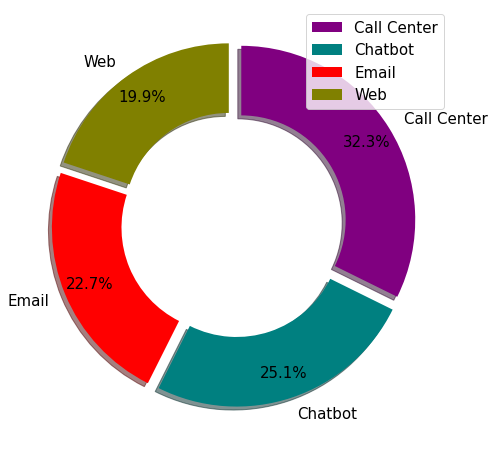

In [54]:
#008080, #808000, #800080, #0000FF, #FF0000
colors = ['#800080', '#008080','#FF0000', '#808000']
labels=['Call Center', 'Chatbot', 'Email', 'Web']
sizes= [32.3, 25.1, 22.7, 19.9]
explode = (0.05, 0.05, 0.05, 0.05)
plt.figure(figsize=[8,8])
plt.pie(sizes,
        labels=labels,
        autopct='%1.1f%%',
        startangle=90,
        counterclock=False,
        wedgeprops={'width':0.4},
        colors=colors, 
        shadow=True,
        pctdistance=0.85,
        explode=explode,);
plt.rcParams['font.size']=15
plt.legend();

In [55]:
import datetime as dt
calls_clean['date'] =  pd.to_datetime(calls_clean['call_timestamp']) ## pandas recognizes your format

calls_clean['day'] = calls_clean['date'].dt.day
calls_clean['month'] = calls_clean['date'].dt.month
calls_clean['year'] = calls_clean['date'].dt.year
# calls_clean['weekday'] = calls_clean['call_timestamp'].dt.day_name

In [56]:
calls_clean.head()

,sentiment,csat_score,call_timestamp,reason,city,state,channel,response_time,call duration in minutes,call_center,date,day,month,year
0,Neutral,7.000000,2020-10-29,Billing Question,Detroit,Michigan,Call-Center,Within SLA,17,Los Angeles/CA,2020-10-29,29,10,2020
1,Very Positive,5.548448,2020-10-05,Service Outage,Spartanburg,South Carolina,Chatbot,Within SLA,23,Baltimore/MD,2020-10-05,5,10,2020
2,Negative,5.548448,2020-10-04,Billing Question,Gainesville,Florida,Call-Center,Above SLA,45,Los Angeles/CA,2020-10-04,4,10,2020
3,Very Negative,1.000000,2020-10-17,Billing Question,Portland,Oregon,Chatbot,Within SLA,12,Los Angeles/CA,2020-10-17,17,10,2020
4,Very Positive,5.548448,2020-10-17,Payments,Fort Wayne,Indiana,Call-Center,Within SLA,23,Los Angeles/CA,2020-10-17,17,10,2020


In [57]:
calls_clean.year.unique()

array([2020], dtype=int64)

In [58]:
calls_clean.month.unique()

array([10], dtype=int64)

In [59]:
calls_clean.day.unique()

array([29,  5,  4, 17, 28, 16, 21,  3,  7,  9, 11,  2, 10,  6, 18, 30, 26,
       12,  8, 22,  1, 27, 13, 19, 23, 14, 25, 15, 24, 20, 31],
      dtype=int64)

In [60]:
calls_clean['day_name']=calls_clean.date.dt.day_name()
calls_clean['day_name'].unique()

array(['Thursday', 'Monday', 'Sunday', 'Saturday', 'Wednesday', 'Friday',
       'Tuesday'], dtype=object)

In [61]:
calls_clean['day_name'].value_counts()

Friday       5570
Thursday     5481
Wednesday    4449
Tuesday      4408
Saturday     4403
Monday       4334
Sunday       4296
Name: day_name, dtype: int64

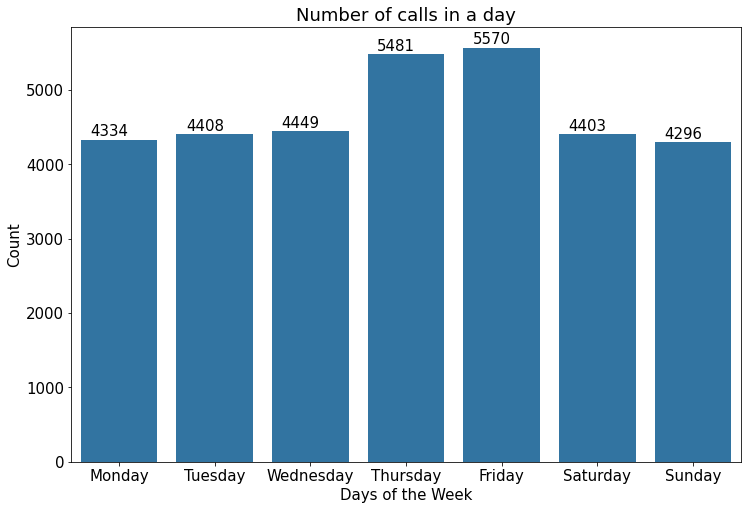

In [75]:
plt.figure(figsize=[12,8])
base_color=sns.color_palette()[0]
ax=sns.countplot(data=calls_clean,
                 x=calls_clean['day_name'],
                 order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"],
                 color=base_color)


for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))
    
plt.title("Number of calls in a day")
plt.ylabel("Count")
plt.xlabel("Days of the Week");

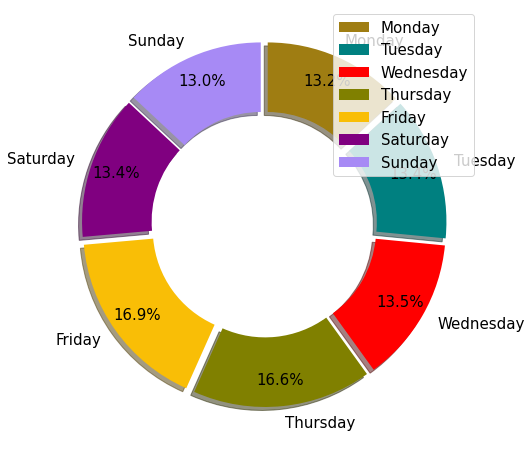

In [76]:
#008080, #808000, #800080, #0000FF, #FF0000, #f9be06, #9f7d12,#b99831, #f5db8a, #a78af5
colors = ['#9f7d12', '#008080','#FF0000', '#808000', '#f9be06', '#800080', '#a78af5']
labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sizes= [4334, 4408, 4449, 5481, 5570, 4403, 4296]
explode = (0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05)
plt.figure(figsize=[8,8])
plt.pie(sizes,
        labels=labels,
        autopct='%1.1f%%',
        startangle=90,
        counterclock=False,
        wedgeprops={'width':0.4},
        colors=colors, 
        shadow=True,
        pctdistance=0.85,
        explode=explode,);
plt.rcParams['font.size']=15
plt.legend();

In [77]:
calls_clean['day'].value_counts()

21    1170
22    1167
6     1152
28    1144
16    1132
9     1123
17    1123
30    1120
13    1117
23    1111
15    1105
19    1102
24    1098
18    1097
10    1092
14    1090
5     1090
1     1089
3     1089
12    1088
11    1087
2     1084
20    1077
8     1067
25    1063
27    1062
26    1054
29    1053
4     1049
7     1045
31       1
Name: day, dtype: int64

In [84]:
!jupyter nbconvert Call_Center_Analysis.ipynb --to slides --post serve --no-input --no-prompt

^C


# Conclusions

The analysis shows that the call center that received most of the calls is Los Angeles/CA which contributed to  41.7% of the total calls received in the month of October, 2020. During the month of october, there are days that these call centers received the most calls. The prevailing day of the week that received most called is **Friday** having **day 21** of the month of October having the highest number of calls received (1170 calls).

There are four channels through which the customers made their calls/enquiries. The leading channel that was used by the customers is through the **call center** which contributes to 32.3% of the total calls received through the four channels. Despite the Covid-19 pandemic, technology had a positive surge as well as people lost their jobs but despite this, it was expected that most calls should have been made through the chatbot or through Email bu customers preferred contacting the call centers directly. This is due to having the reason behind most calls recieved as **Billing Questions**. Billing Questions contributed to 62.6% of three reasons of the calls being made ***(Billing, Payments and Service Outage)***. This is more than half indicatng that most bills that were made wren't reflecting or weren't being serviced to the customers. 

This explains why the highest sentiment recieved was Very Negative (26.6%) and Negative (33.6%). Having negavtive sentiments from your customers about your customer services is alarming. These neagtive sentiments contributed to 60.6%. The positive sentiments only contributed to 21.5% (Very Positive-9.6% and Positive-11.9%). This is alarming!

Another reason that could have contributed to the high negative sentiments could be due to the SLA. In as much as we have most calls within SLA (62.6%) which is a positive sign, calls Above SLA have the least contribution (12.7%) while that Below SLA is 24.7% and that shouldn't be the case.

However that doesn't necessary to a correlation of causation of having negative sentiments and the Service Level Agreements. The negative sentiments could be completely related to the products offered by the institution and not the customer care services.

These calls lasted between 10 to 40 minutes. 40 minutes is too long to resolve an issue by the respective call centers.